# Skin Cancer Detection using CNN

### Step 1: Importing important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Defining the path for train and test images
train_path="drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
test_path="drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

#### Above loads Train and Test data. Both are having images of 9 different catergories of Cancer types which will be used for Model training, evaluation and prediction

#### Getting count of Train and Test image



In [15]:
count_train_images = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images count - ",count_train_images)
count_test_images = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images count - ",count_test_images)

Train images count -  2239
Test images count -  118


### Step 2: Data Preparation

In [8]:
# As mentioned in assignment, keeping batch size as 32 and image size as 180x180

batch_size = 32
img_height = 180
img_width = 180

In [16]:
# Creating Train Data Set

# Keeping 80% for Train and 20% for Validation

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [17]:
# Creating Validation Data Set

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# Priting different classes under Validation dataset

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Step 3: Data Visualization

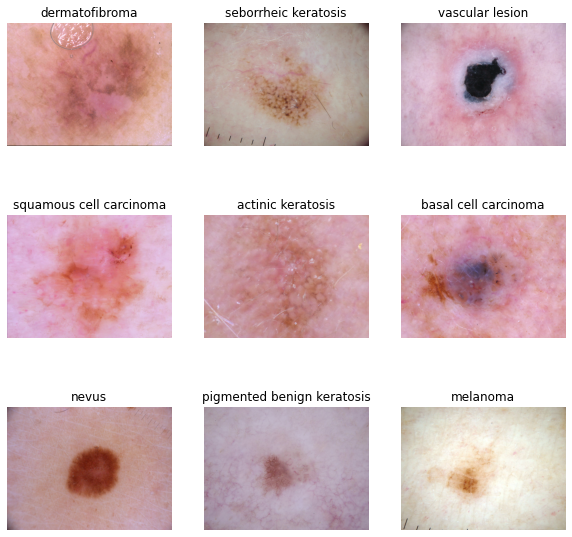

In [ ]:
num=0
plt.figure(figsize=(10,10))
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

In [ ]:
# Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

# Dataset.prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### **Step 4: Modelling**

### Model 1

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

#### Compile the Model

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the Model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 322s 3s/step - loss: 3.0946 - accuracy: 0.1920 - val_loss: 2.0239 - val_accuracy: 0.2013
Epoch 2/20
56/56 [==============================] - 103s 2s/step - loss: 1.8520 - accuracy: 0.3426 - val_loss: 2.0265 - val_accuracy: 0.3221
Epoch 3/20
56/56 [==============================] - 106s 2s/step - loss: 1.7266 - accuracy: 0.3968 - val_loss: 1.5537 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 104s 2s/step - loss: 1.6217 - accuracy: 0.4375 - val_loss: 1.7129 - val_accuracy: 0.4653
Epoch 5/20
56/56 [==============================] - 104s 2s/step - loss: 1.5135 - accuracy: 0.4643 - val_loss: 1.4523 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 104s 2s/step - loss: 1.4148 - accuracy: 0.5095 - val_loss: 1.6152 - val_accuracy: 0.4251
Epoch 7/20
56/56 [==============================] - 105s 2s/step - loss: 1.4209 - accuracy: 0.5028 - val_loss: 1.4676 - val_accuracy: 0.5078
Epoch 8/20
56

In [ ]:
# View model summary through its all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

#### Plotting and Analysing Training Results

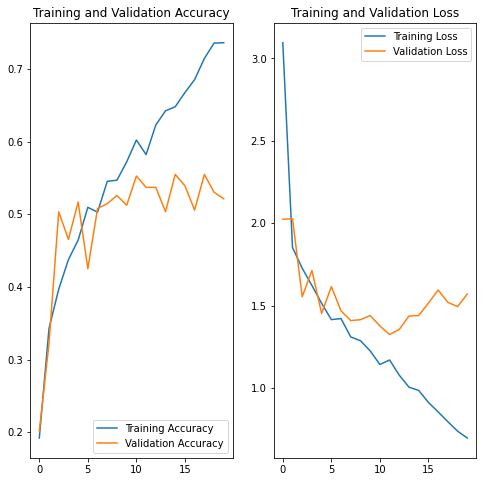

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation:

1. Training accuracy has reached upto 73.60% but the Validation accuracy is low and reached at 52.13%
2. The Validation loss has fallen in last epoches run i.e. mostly after 10 epoches
3. This shows sign of Overfitting with this model
4. Some hyperparameter tunning will be required to decrease the overfitting

#### Model 2: Increasing the `Droput value and adding one more layer` to decrease Overfitting

In [ ]:
model_2=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),   
    Dense(9, activation='softmax')
])

#### Complile the Model

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training the Model

In [ ]:
epochs = 20
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 716s 11s/step - loss: 2.2005 - accuracy: 0.1763 - val_loss: 2.0786 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 378s 7s/step - loss: 2.0463 - accuracy: 0.1931 - val_loss: 2.0312 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 376s 7s/step - loss: 2.0315 - accuracy: 0.1847 - val_loss: 2.0400 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 377s 7s/step - loss: 2.0293 - accuracy: 0.1981 - val_loss: 2.0354 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 378s 7s/step - loss: 2.0283 - accuracy: 0.2059 - val_loss: 2.0470 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 376s 7s/step - loss: 2.0403 - accuracy: 0.2081 - val_loss: 2.0315 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 376s 7s/step - loss: 2.0320 - accuracy: 0.2009 - val_loss: 2.0321 - val_accuracy: 0.2058
Epoch 8/20
5

#### Plotting Training Results and Analysis

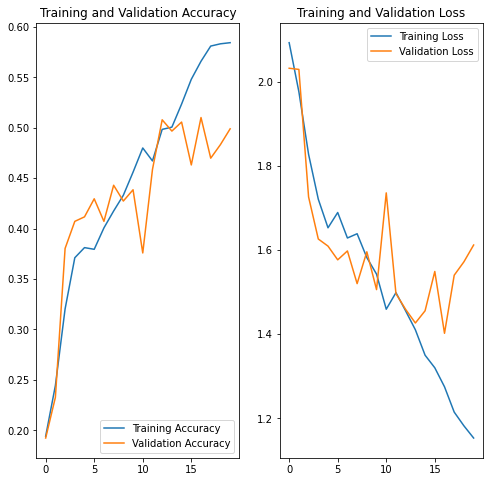

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation:

1. Above plot shows that there is s**ignificant reduction in Overfitting in comparison to Model 1**.

2. Although the accuracy has decreased. **Training Accuracy reached at 58.43% and Validation accuracy reached at 49.89%**

3. We will now go for Data Augmentation to see it impact on Overfitting and Accuracy

### **Step 5: Data Augmentation**

#### Specifying Data Augmentation

In [ ]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

#### Plotting Augmentated Training Data

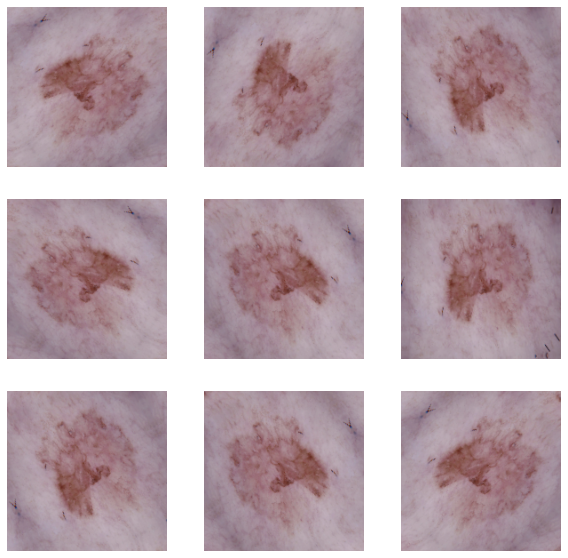

In [ ]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

### Model 3

Adding Model 2 parameters with added Augmented data to observe any improvments

In [ ]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),   
    Dense(9, activation='softmax')
])

#### Compile the Model

In [ ]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

#### Training the Model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 17s 253ms/step - loss: 2.0909 - accuracy: 0.1864 - val_loss: 2.0656 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 16s 249ms/step - loss: 2.0407 - accuracy: 0.1953 - val_loss: 2.0408 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 16s 251ms/step - loss: 2.0309 - accuracy: 0.1914 - val_loss: 2.0254 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 17s 275ms/step - loss: 1.9660 - accuracy: 0.2405 - val_loss: 1.8813 - val_accuracy: 0.2908
Epoch 5/20
56/56 [==============================] - 16s 254ms/step - loss: 1.9236 - accuracy: 0.2718 - val_loss: 1.9905 - val_accuracy: 0.2573
Epoch 6/20
56/56 [==============================] - 16s 253ms/step - loss: 1.8844 - accuracy: 0.2924 - val_loss: 1.7901 - val_accuracy: 0.3221
Epoch 7/20
56/56 [==============================] - 15s 246ms/step - loss: 1.7640 - accuracy: 0.3404 - val_loss: 1.9851 - val_accuracy: 0.2483

#### Plotting Training Results and Analysis

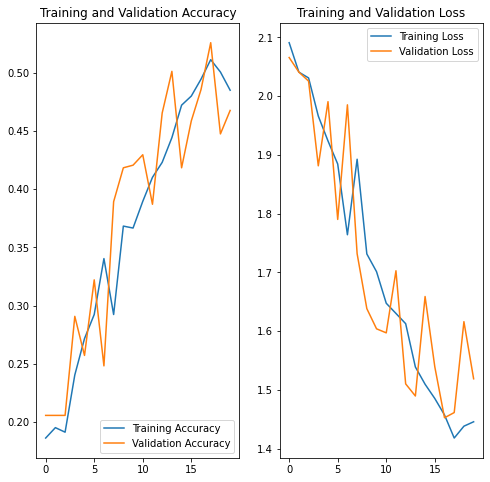

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation:

1. Above model has shown that **Data Augmentation has worked well on the reducing the Overfitting**.

2. On the part of Accuracy, it has not helped much but overfitting has reduced.

3. **Training Accuracy --> 48.89%** and **Validation Accuracy --> 46.76%**

### **Step 5: Verifying Class Imbalance**

In [18]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


#### Observation:

1. It can be seen that there is high class imbalance among the different classes
2. *seborrheic keratosis* has 77 count whereas *melanoma* has 357 count

### **Step 6: Treating Class Imbalance using Augmentor method**

In [4]:
# Installing Augmentor

!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# Using Augmentor to add 500 samples in each class so that each class is having almost same data

#To use Augmentor, the following general procedure is followed:

#Instantiate a Pipeline object pointing to a directory containing your initial image data set
#Define a number of operations to perform on this data set using your Pipeline object
#Execute these operations by calling the Pipeline’s sample() method

path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB9E049CE90>: 100%|██████████| 500/500 [00:18<00:00, 27.66 Samples/s]


Initialised with 376 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB9F736B410>: 100%|██████████| 500/500 [00:20<00:00, 24.40 Samples/s]


Initialised with 95 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB9F9BF90D0>: 100%|██████████| 500/500 [00:18<00:00, 26.66 Samples/s]


Initialised with 438 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x682 at 0x7FB9E02BC950>: 100%|██████████| 500/500 [01:29<00:00,  5.60 Samples/s]


Initialised with 357 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB9E02F7290>: 100%|██████████| 500/500 [01:25<00:00,  5.83 Samples/s]


Initialised with 462 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB9E02A3D50>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]


Initialised with 77 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB9F9247D10>: 100%|██████████| 500/500 [00:41<00:00, 11.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB9E0563390>: 100%|██████████| 500/500 [00:19<00:00, 25.18 Samples/s]


Initialised with 139 image(s) found.
Output directory set to drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB9E02CD310>: 100%|██████████| 500/500 [00:17<00:00, 28.80 Samples/s]


In [20]:
# Getting count of Augmented Train images

count_aug_train_images = len(list(data_dir_train.glob('*/output/*.jpg')))
print(count_aug_train_images)

4500


In [21]:
# Following below step to amalgate augmented images with Training images

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

train_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

# Dataframe to collate augmented images with Train set images

dataframe_dict_new = dict(zip(path_list, train_list_new))

for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


#### Above now, it can be seen that all classes are now having almost equal images distribution

#### Creating new model with Augmented Data

In [22]:
batch_size = 32
img_height = 180
img_width = 180

In [23]:
# Creating Trainning Set

data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [24]:
# Creating Validation Set

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Model 4

In [25]:
model_4=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [26]:
# Compile the Model

model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [27]:
# Train the Model_4 for 20 epochs

epochs = 20
history = model_4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 44s 179ms/step - loss: 3.0110 - accuracy: 0.1380 - val_loss: 2.1154 - val_accuracy: 0.2108
Epoch 2/20
169/169 [==============================] - 32s 180ms/step - loss: 2.1386 - accuracy: 0.1671 - val_loss: 2.0663 - val_accuracy: 0.2123
Epoch 3/20
169/169 [==============================] - 31s 177ms/step - loss: 1.8047 - accuracy: 0.3162 - val_loss: 1.5408 - val_accuracy: 0.4254
Epoch 4/20
169/169 [==============================] - 30s 174ms/step - loss: 1.5474 - accuracy: 0.4267 - val_loss: 1.4706 - val_accuracy: 0.4551
Epoch 5/20
169/169 [==============================] - 32s 184ms/step - loss: 1.3994 - accuracy: 0.4655 - val_loss: 1.3068 - val_accuracy: 0.5019
Epoch 6/20
169/169 [==============================] - 31s 177ms/step - loss: 1.2877 - accuracy: 0.5091 - val_loss: 1.3110 - val_accuracy: 0.5189
Epoch 7/20
169/169 [==============================] - 31s 177ms/step - loss: 1.1795 - accuracy: 0.5592 - val_loss: 1.0983 - val_ac

#### Plotting Model_4 with 20 epochs Results

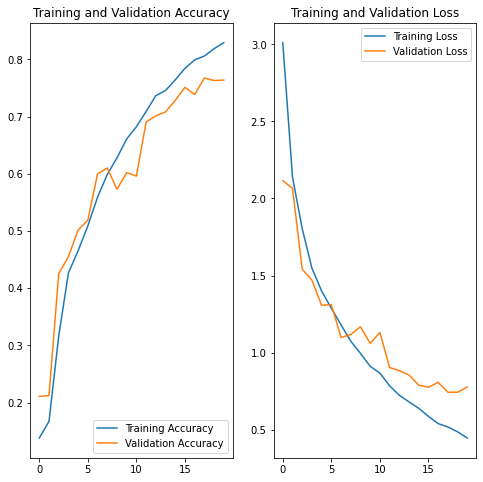

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation:

1. **Training Accuracy has reached --> 82.94%** and **Validation Accuracy --> 76.39%**

2. Removing Class Imbalance has helped in reducing Overfitting and Improving the Accuracy score as well


In [33]:
# Train the Model_4 for 30 epochs

epochs = 30
history = model_4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 31s 177ms/step - loss: 0.4307 - accuracy: 0.8366 - val_loss: 0.7564 - val_accuracy: 0.7713
Epoch 2/30
169/169 [==============================] - 32s 177ms/step - loss: 0.4182 - accuracy: 0.8433 - val_loss: 0.7886 - val_accuracy: 0.7669
Epoch 3/30
169/169 [==============================] - 30s 174ms/step - loss: 0.4180 - accuracy: 0.8461 - val_loss: 0.7945 - val_accuracy: 0.7520
Epoch 4/30
169/169 [==============================] - 30s 173ms/step - loss: 0.3900 - accuracy: 0.8529 - val_loss: 0.7644 - val_accuracy: 0.7713
Epoch 5/30
169/169 [==============================] - 30s 174ms/step - loss: 0.3533 - accuracy: 0.8605 - val_loss: 0.7982 - val_accuracy: 0.7758
Epoch 6/30
169/169 [==============================] - 30s 174ms/step - loss: 0.3593 - accuracy: 0.8644 - val_loss: 0.7860 - val_accuracy: 0.7832
Epoch 7/30
169/169 [==============================] - 30s 174ms/step - loss: 0.3224 - accuracy: 0.8737 - val_loss: 0.7985 - val_ac

#### Plotting Model_4 with 30 epochs Results

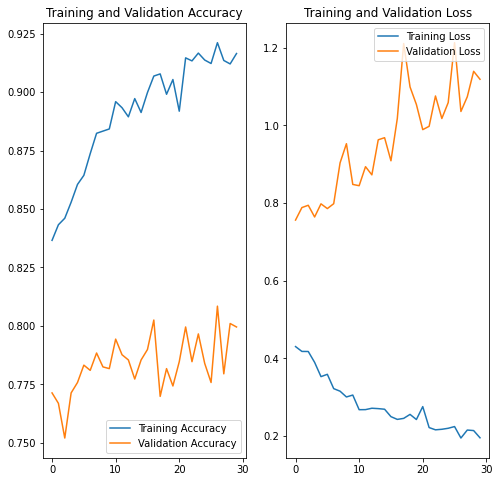

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation:

1. **Training Accuracy has reached around --> 90%** and **Validation Accuracy --> 80%**

2. Removing Class Imbalance has helped in reducing Overfitting and Improving the Accuracy score as well

3. Overfitting still can be reduced by tunning the hyperparameters i.e. working with dropout value and adding some more layers

#### **Model 5 (Final Model)** -->

- Adding some more layers in Model 4 to see its impact on Overfitting and Accuracy

In [35]:
model_5=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [36]:
# Compile the Model

model_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [37]:
# Train the Model

epochs = 30
history = model_5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 32s 177ms/step - loss: 2.1822 - accuracy: 0.1508 - val_loss: 2.1890 - val_accuracy: 0.1173
Epoch 2/30
169/169 [==============================] - 31s 179ms/step - loss: 2.1773 - accuracy: 0.1435 - val_loss: 2.1799 - val_accuracy: 0.1314
Epoch 3/30
169/169 [==============================] - 31s 176ms/step - loss: 2.0739 - accuracy: 0.2055 - val_loss: 1.8258 - val_accuracy: 0.2851
Epoch 4/30
169/169 [==============================] - 31s 179ms/step - loss: 1.7721 - accuracy: 0.3162 - val_loss: 1.7536 - val_accuracy: 0.3318
Epoch 5/30
169/169 [==============================] - 33s 192ms/step - loss: 1.6348 - accuracy: 0.3689 - val_loss: 1.6614 - val_accuracy: 0.3482
Epoch 6/30
169/169 [==============================] - 31s 176ms/step - loss: 1.5357 - accuracy: 0.4045 - val_loss: 1.4510 - val_accuracy: 0.4217
Epoch 7/30
169/169 [==============================] - 31s 177ms/step - loss: 1.4618 - accuracy: 0.4329 - val_loss: 1.5018 - val_ac

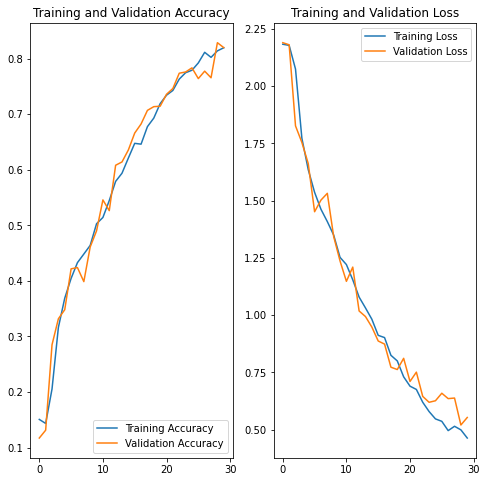

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation:

1. **Model_5 has been the best model in terms of preventing Overfitting**. 

2. **Training and Validation accuracy has reached almost same level at 82%**

3. Although, with more better Hyperparameter tunning, Accuracy can be improved.